### RESTU ADITYA RACHMAN
### 1301190433
### IF 43 03

Pada kali saya mengambil Tema Crypto Currency. data yang saya ambil berasal dari feed twitter dengan hastag #CryptoCurrency

# Import Library

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tweepy as tw 
from tqdm import tqdm

import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
token = WordPunctTokenizer()

from wordcloud import WordCloud, STOPWORDS

from PIL import Image

# Data Scraping

In [ ]:
api_key = "q3URylHd288HnMnGajsTHEgEp"
api_key_secret = "tH2F1DnhmJFlwE5gezsPqei9b8dOpoARspgjOwHQUIiQXj3xvr"

In [ ]:
auth = tw.OAuthHandler(api_key, api_key_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
# ambil tweetnya dengan batas maximal 5000 tweets dengan search key "Microsoft"
tweets = tw.Cursor(api.search,
              q="#CryptoCurrency -filter:retweets",
              since="2021-11-26",
              until="2021-11-30",
              lang='en'     
              ).items(5000) 

In [ ]:
#masukan kedalam list tweets_copy (data masih dalam format json)
tweets_copy = []
for tweet in tqdm(tweets):
    tweets_copy.append(tweet)

5000it [01:14, 67.05it/s]


In [ ]:
#ambil data yang diperlukan saja, seperti username akun, tweetnya, dan kapan tweet itu dibuat
res = []
for tweet in tqdm(tweets_copy):
    text = tweet._json["text"]
    user_name = tweet.user.name
    created_at = tweet.created_at
    
    line = {'username' : user_name, 'text' : text, 'created_at' : created_at}
    res.append(line)

100%|██████████| 5000/5000 [00:00<00:00, 229518.01it/s]


In [ ]:
# simpan kedalam spiderman_tweets.csv
df = pd.DataFrame(res)
df.to_csv('crypto.csv')

# Data Cleaning

In [ ]:
df = pd.read_csv("crypto.csv") # loads csv file into pandas dataframe
pd.options.display.max_colwidth = 200 
df.head() # prints out first few columns in a dataframe

,Unnamed: 0,username,text,created_at
0,0,NFTStudio7.io,May the Ada Lovelace be with you! #Ada #AdaLovelace #Mathematics #Lady #Women #YesallMathematicians #comedy… https://t.co/l9ssCfybLp,2021-11-29 23:59:56
1,1,Crypto Watch Bot,Best #cryptocurrency risk-adjusted returns in the past 24 hours:\n1. #Tezos $XTZ\n2. #OmiseGO $OMG\n3. #Avalanche $AVAX https://t.co/GbQpCeB01j,2021-11-29 23:59:56
2,2,Adenurhakim🕳️TBX,@BofBdc Wonderful promising project\nThe project is implemented very professionally and has a clear development plan… https://t.co/U4g1qEY66b,2021-11-29 23:59:29
3,3,Beefore - Crypto breaking news,Breaking News Rating: 9/10\nCoin Ticker: $SOLO\nPrice changed +0.42% within 5 minutes\n#crypto #bitcoin #blockchain… https://t.co/obMJM9Savr,2021-11-29 23:59:28
4,4,Naomi $Swift $BTC $ETH,"@TheMoonCarl $PKR, it's got the tendency to do a 100x. It was named third in @CoinShala's Top 15 #Gaming #Gems wit… https://t.co/sUc1lLNyUN",2021-11-29 23:59:25


In [ ]:
pattern = re.compile(r'(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?')
match = re.sub(pattern,'',df.loc[0].to_string())
match

'Unnamed: 0                                                                                                                                       0\nusername                                                                                                                             \ntext          May the Ada Lovelace be with you! #Ada #AdaLovelace #Mathematics #Lady #Women #YesallMathematicians #comedy… \ncreated_at                                                                                                                     2021-11-29 23:59:56'

In [ ]:
combined_re = re.compile( '|'.join(['@[A-Za-z0–9_]+', '#']) )
regex_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
pattern = re.compile(r'(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?')

def cleaning_tweets(t):
    # Remove URL
    del_url = re.sub(pattern,'',t)

    # html to text
    del_amp = BeautifulSoup(del_url, 'lxml')
    del_amp_text = del_amp.get_text()

    # Remove link mention (@ and #)
    del_link_mentions = re.sub(combined_re, '', del_amp_text)

    # Remove emticons, symbols, pictographs, transport, map symbols, and flags
    del_emoticons = re.sub(regex_pattern, '', del_link_mentions)

    # To lower case
    lower_case = del_emoticons.lower()
    words = token.tokenize(lower_case)
    result_words = [x for x in words if len(x) > 2]
    return (" ".join(result_words)).strip()

In [ ]:
print("Cleaning the tweets...\n")
cleaned_tweets = []
for i in range(0,3000): #3000 columns in our dataframe
    if( (i+1)%100 == 0 ):
        print("Tweets {} of {} have ben processed".format(i+1,3000))                                                                  
    cleaned_tweets.append(cleaning_tweets((df.text[i])))

Cleaning the tweets...

Tweets 100 of 3000 have ben processed
Tweets 200 of 3000 have ben processed
Tweets 300 of 3000 have ben processed
Tweets 400 of 3000 have ben processed
Tweets 500 of 3000 have ben processed
Tweets 600 of 3000 have ben processed
Tweets 700 of 3000 have ben processed
Tweets 800 of 3000 have ben processed
Tweets 900 of 3000 have ben processed
Tweets 1000 of 3000 have ben processed
Tweets 1100 of 3000 have ben processed
Tweets 1200 of 3000 have ben processed
Tweets 1300 of 3000 have ben processed
Tweets 1400 of 3000 have ben processed
Tweets 1500 of 3000 have ben processed
Tweets 1600 of 3000 have ben processed
Tweets 1700 of 3000 have ben processed
Tweets 1800 of 3000 have ben processed
Tweets 1900 of 3000 have ben processed
Tweets 2000 of 3000 have ben processed
Tweets 2100 of 3000 have ben processed
Tweets 2200 of 3000 have ben processed
Tweets 2300 of 3000 have ben processed
Tweets 2400 of 3000 have ben processed
Tweets 2500 of 3000 have ben processed
Tweets 260

# Word Cloud

In [ ]:
string = pd.Series(cleaned_tweets).str.cat(sep=' ')

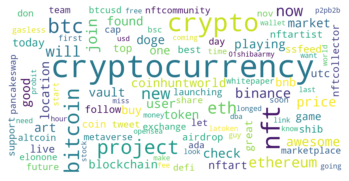

In [ ]:
# Create stopword list:
stopwords = set(STOPWORDS)

# # Generate a word cloud image
wordcloud = WordCloud(width=1600, 
                      stopwords=stopwords,
                      height=800,
                      max_font_size=150,
                      max_words=100,
                      collocations=False,
                      background_color="white").generate(string)

# # Display the generated image:
# # the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Custom Word Cloud

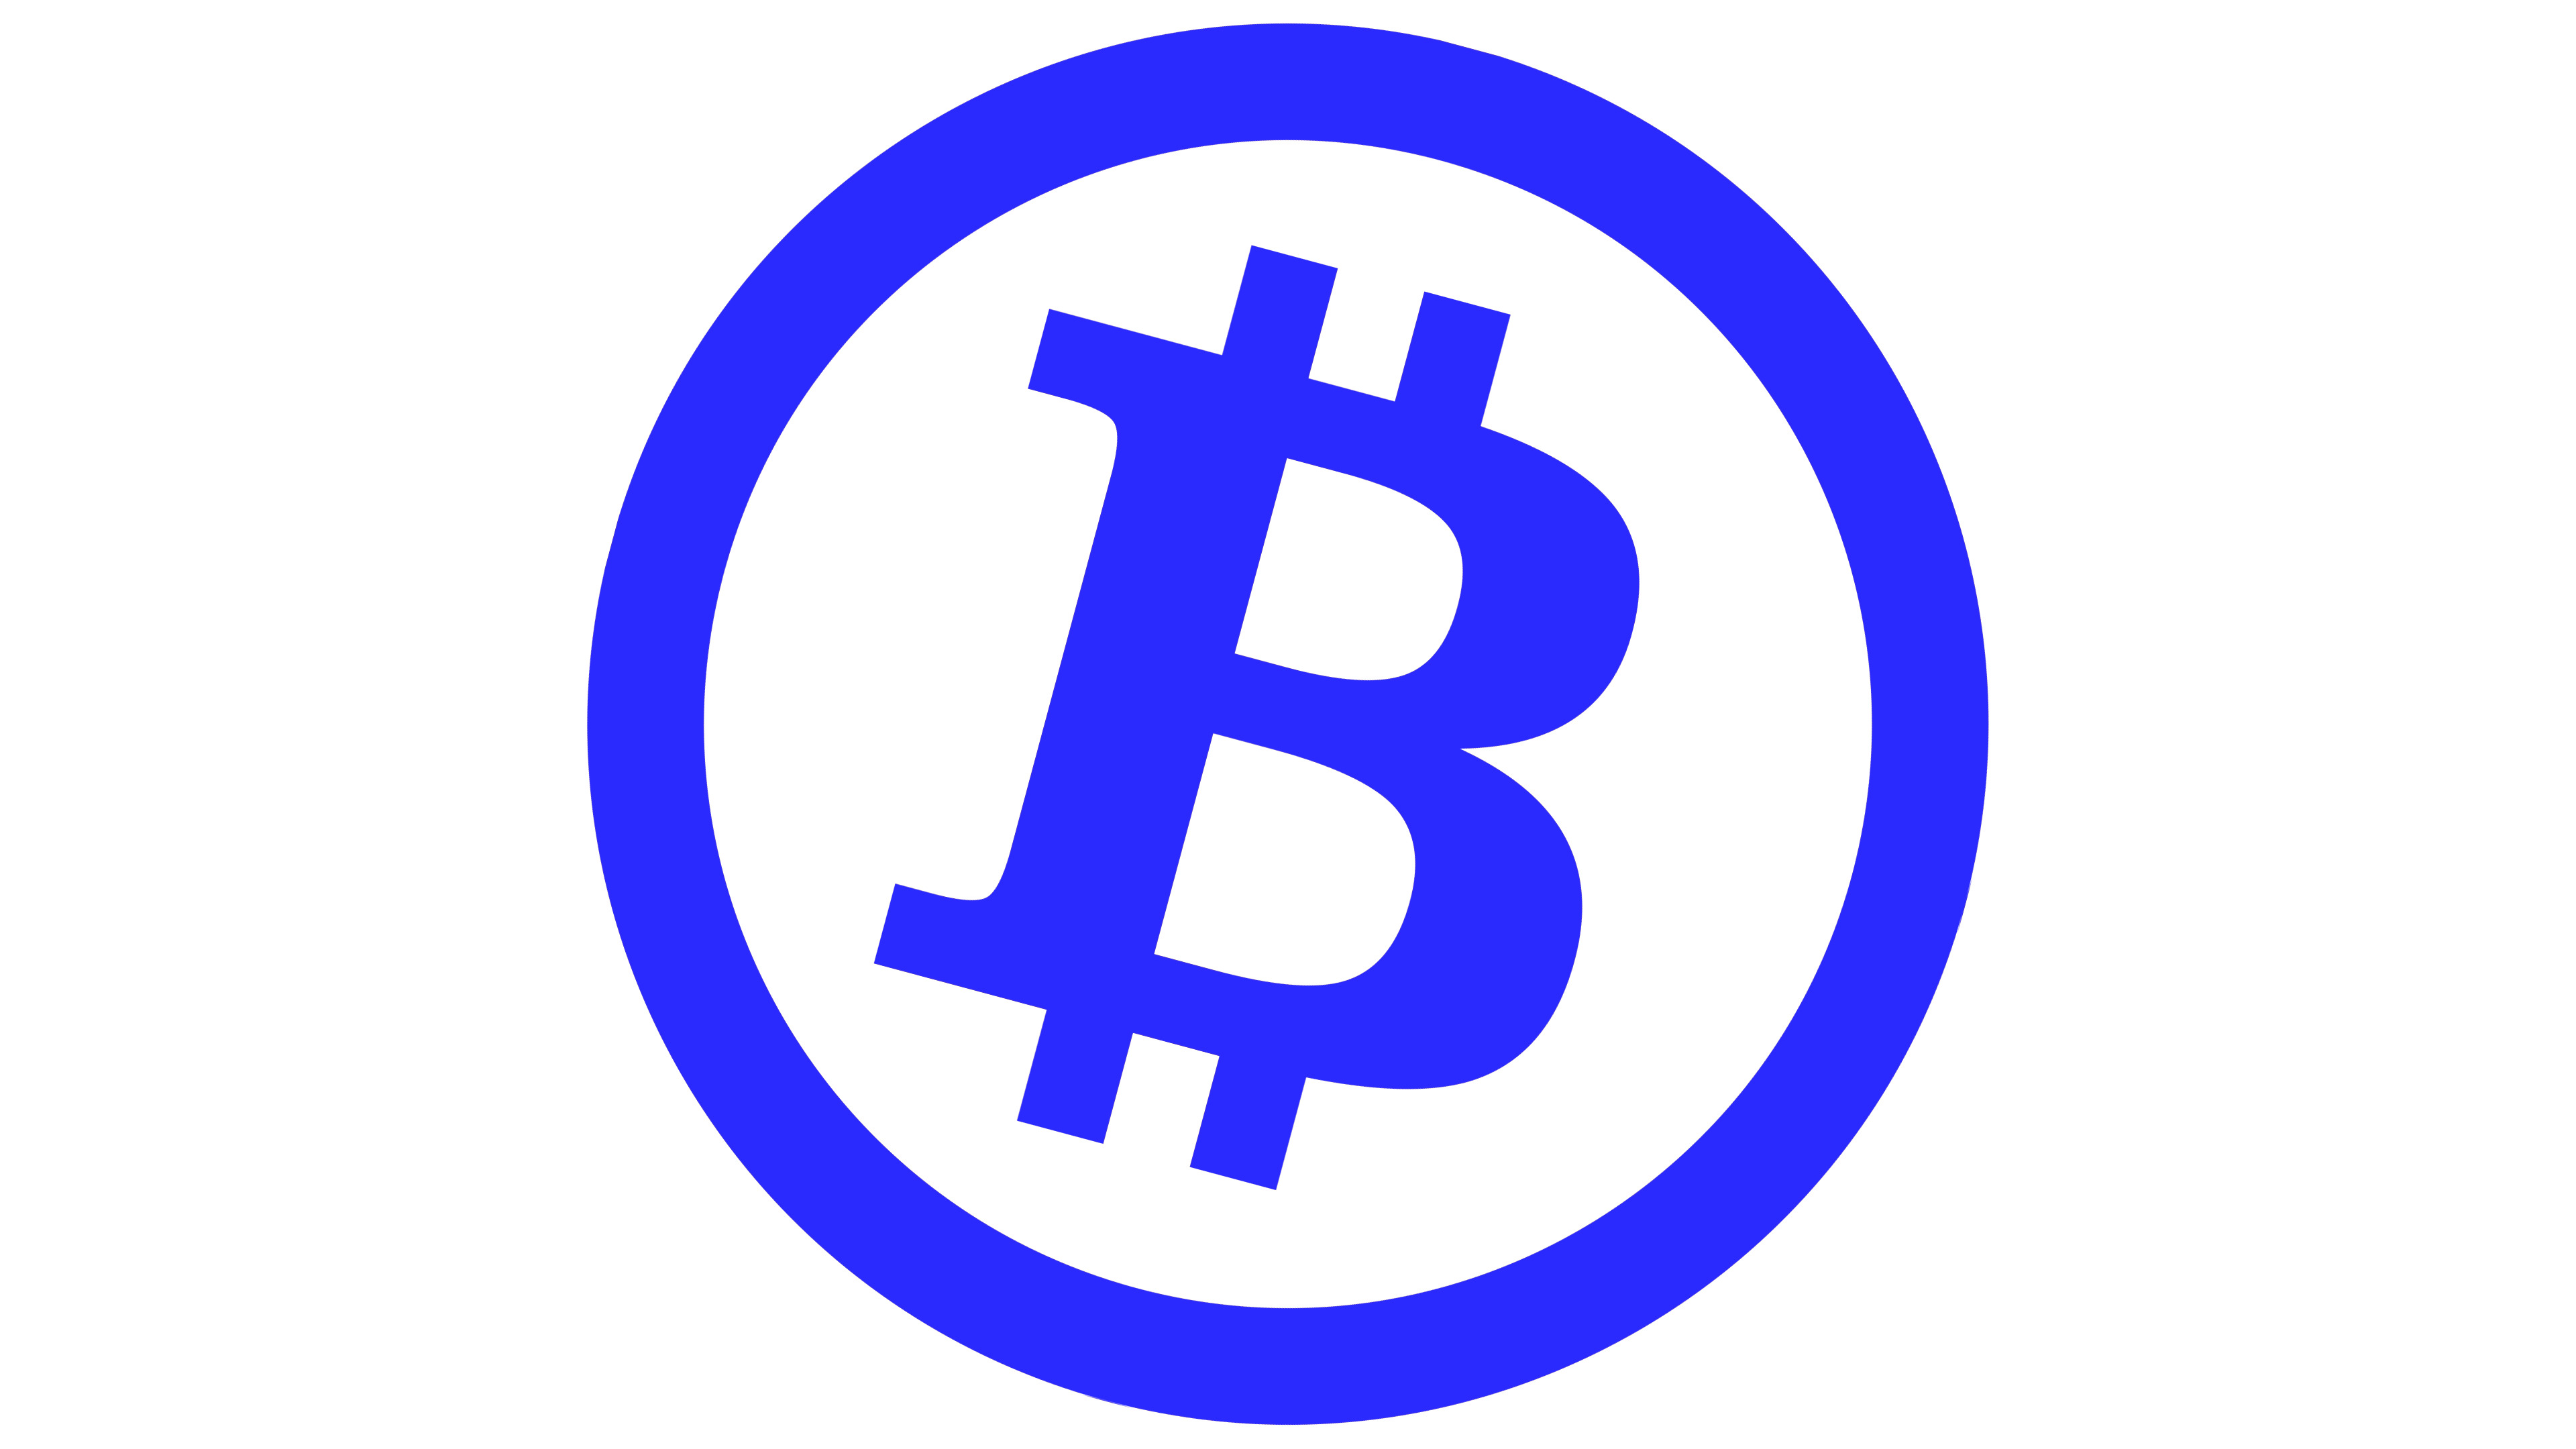

In [ ]:
#Melihat gambar 
img = Image.open('test.jpg')
img

In [ ]:
bfly = np.array(img)
bfly

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

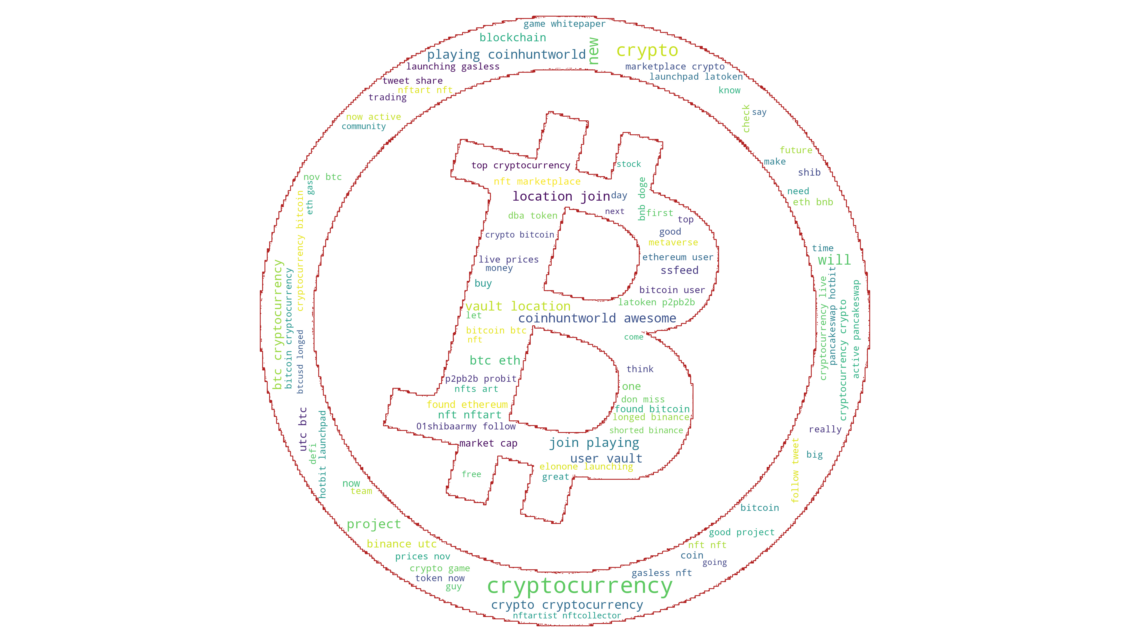

In [ ]:
# Create a word cloud image
wc = WordCloud(background_color="white", 
               max_words=100, 
               mask=bfly,
               stopwords=stopwords, 
               contour_width=3, 
               contour_color='firebrick')

# Generate a wordcloud
wc.generate(string)

# store to file
wc.to_file("wordcloud.png")

# show
plt.figure(figsize=[20,20])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()